In [ ]:
# 2.jpg
# kütüphaneleri yüklüyoruz.
# matplotlib  grafik cizdirme icin

import tensorflow as tf
import matplotlib.pyplot as plt
 
# Veri setini yüklüyoruz
# fashion_mnist cok populer bir veri seti
# ayrica tensorflow'da hazır yüklü

f_mnist =tf.keras.datasets.fashion_mnist
# veri setini egitim ve test olarak ayırıyoruz
(x_train,y_train),(x_test,y_test) = f_mnist.load_data() # dataset'te klasorlere ayrılmıs,train ve test olarak onları ayırıyor
# resimleri 0 ile 1 arasına cektik
x_train,x_test = x_train / 255.0 , x_test / 255.0  

In [ ]:
# y_test[0:10] # array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)  # labeller var yani kedi mi köpek mi, labellardır, imagesler degil
# y_train[:10] #  array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

""" 
x_train[:2] yazdım ve output :
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
"""

In [ ]:
"""
What is the difference between x_train and x_test in Keras?
The training set is a subset of the data set used to train a model.

x_train is the training data set.
y_train is the set of labels to all the data in x_train.
The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

x_test is the test data set.
y_test is the set of labels to all the data in x_test.
The validation set is a subset of the data set (separate from the training set) that you use to adjust hyperparameters.
"""

In [ ]:
# 3.jpg
# modeli olusturduk
model = tf.keras.models.Sequential([
    # veriyi düzlestirdik,yani vector haline getirdik.
    # buradaki input shape, resimlerin boyutu
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 512 nörona sahip bir katman olusturduk.
    # activasyon fonksiyonu relu
    tf.keras.layers.Dense(512,activation="relu"),
    # bu son katman yani cıkıs katmanı 
    #10 nöron olam sebebi veride 10 sınıf olması
    # 2 den fazla sınıf oldugu için softmax kullandık
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
# 4.jpg
# modele ait diger hiperparametreleri ayarlıyoruz
# optimizer etiket ile tahmin arasındaki farkı azaltmaya calısır
# loss etiket ile tahmin arasındaki fark
# metrik olarak accuracy'i belirledik,yani modelin dogruluk oranı
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# 5.jpg
# egitime baslıyoruz.
# egitim verisi kullanarak egitim yapıyor.
# her bir epoch bitince de validation data'ya bakarak
# modelin egitimde gormedigi verilerdeki basarısı bulunur.
# her bir epoch forward ve backward'dan olusur.
# forward modelin kendisine verilen veriden sonuc bulması
# backward ise modelin parametrelerini optimizer ile iyileştirilmesi
# burada 10 epoch var
r=model.fit(x_train, y_train,
            validation_data=(x_test,y_test),epochs=2) # epochs=10 yaptı ben hızlı olsun diye 1 yaptım


In [ ]:
# 5.jpg
# modelin test verisi üstündeki basarısı
model.evaluate(x_test, y_test)

"\nmaxmimum 10000 resim var,\ni nin alacagı max deger 9999'dur.\n"

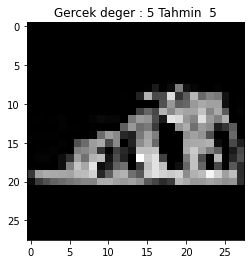

In [ ]:
# 6.jpg
# burada test verisindeki bir gorseli cizdirip ardırdan modeli test verisine
# tahmin ettirip sectigimiz görselin gercek degeri ile modelin tahminini
# ekranda gösterecegiz
# burada i degerini degiştirerek farklı görselleri test edebiliriz
i=11
#gorseli ekranda gösterme için
plt.imshow(x_test[i],cmap="gray")
# modele tüm test verisini tahmin ettiriyoruz,sanırım Flatten yaptıgımız için axis=1 yaptık .
tahmin=model.predict(x_test).argmax(axis=1)
# grafige baslık olarak gorselin gercek ve tahmin edilen degerini gösteriyoruz
plt.title("Gercek deger : %s Tahmin  %s" % (y_test[i],tahmin[i]))

"""
maxmimum 10000 resim var,
i nin alacagı max deger 9999'dur.
"""


